# Tasks 2020
***

The following contains solutions to the task assignments for the Fundamentals of Data Analysis module 2020.

The author of the following tasks is Dervla Candon (G00283361@gmit.ie)
***

## Task 1

_Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A'] should have output {'A': 3, 'B': 1, 'C': 1} . Your code should not depend on any module from the standard library or otherwise. You should research the task first and include a description with references of your algorithm in the notebook._


To complete this task, the function will need to perform the following steps:
 * take a list as input
 * iterate through the list
 * if an element is unique, it is added to the output set and assigned a count of 1
 * if an element is not unique, its count in the output set is increased by 1
 
In order to produce an output with a key:value format, a dictionary set must be used[1][2].

In [1]:
def counts(input_list):
    #creating an empty dictionary to hold the output
    output = dict()
    #for loop will iterate through each element in the input
    for i in input_list:
        #2 scenarios covered by if loop, either the element is new and needs to be added to the output
        #or the element already exists in the output and the value should be increased accordingly
        if i not in output:
            output[i] = 1
        else:
            output[i] += 1
    return output

In [2]:
#testing the function using the sample input in the task brief
counts(['A','A','B','C','A'])

{'A': 3, 'B': 1, 'C': 1}

In [3]:
#testing the function with further input
x = [2,4,8,4,2,6,9,2,4,5,6,7,8,1,1,1,1,7]
counts(x)

{2: 3, 4: 3, 8: 2, 6: 2, 9: 1, 5: 1, 7: 2, 1: 4}

***

## Task 2

_Write a Python function called dicerolls that simulates rolling dice. Your function should take two parameters: the number of dice k and the number of times to roll the dice n. The function should simulate randomly rolling k dice n times, keeping track of each total face value. It should then return a dictionary with the number of times each possible total face value occurred. So, calling the function as diceroll(k=2, n=1000) should return a dictionary like: {2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}_

_You can use any module from the Python standard library you wish and you should include a description with references of your algorithm in the notebook._

At a high level the dicerolls function will perform the following steps:
 - randomly generate a number between 1 and 6 inclusive k times
 - sum together the k values, and store this value within an array
 - repeat the above 2 steps n times.
 - input the resulting array into the counts() function to output the results in a summarising dictionary.
 
In order to generate random integers, randit from the random library in python will provide the required functionality [3].

In [4]:
import random
def dicerolls(k,n):
    # define an empty array to store the value for each iteration of rolling the dice
    output = []
    for i in range(n):
        # define roll as a variable to store the sum of all rolled dice for each throw
        roll = 0
        for j in range(k):
            # randint is inclusive of the upper and lower bounds, so 1 and 6 are used as input parameters
            roll += random.randint(1,6)
        output.append(roll)
    # the counts function will add up the occurence of each possible result
    return counts(output)

When a single dice is used, it is expected that each value would have an equal likelihood of appearing.

In the below example, I have taken a large size n to better show how evenly spread the frequency is.
For n=10000, the expected frequency of each number would be (1/6)*10000 = 1666.67

In [5]:
x = dicerolls(1,10000)
x

{5: 1657, 1: 1722, 2: 1631, 6: 1684, 3: 1597, 4: 1709}

As the number of dice increases, the likelihood of occurences now varies; the more ways a number can be generated, the higher the expected frequency

In [6]:
y = dicerolls(2,10000)
y

{8: 1374,
 9: 1121,
 12: 285,
 11: 563,
 6: 1362,
 3: 554,
 7: 1639,
 2: 270,
 10: 860,
 4: 860,
 5: 1112}

A plot of the single die should be approaching a uniform trend; at first glance this does not seem realistic, as the plot appears to vary greatly between die values.

However, this apparent variance makes more sense when the values plotted on the y-axis are noted.

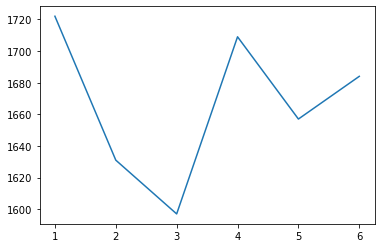

In [7]:
import matplotlib.pyplot as plt
# method for plotting a dictionary found at [4]
a,b = zip(*sorted(x.items()))
plt.plot(a,b)
plt.show()

By setting a fixed lower and upper limit on the y-axis, the uniform trend of the results is now much more apparent.

<function matplotlib.pyplot.show(*args, **kw)>

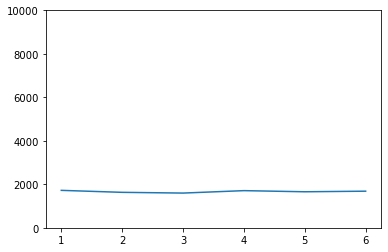

In [8]:
plt.ylim(bottom=0,top=10000)
plt.plot(a,b)
plt.show

As the number of dice increases, the graph would now be expected to peak at a central point, where there are a greater number of combinations which result in the total value.

Given the symmetry between high/low values and the number of combinations which can generate those values (for example, both 2 and 12, the highest and lowest possible values, both have 1 combination which generates that result when 2 dice are used), any plot of 2 or more dice should be (roughly) symmetrical

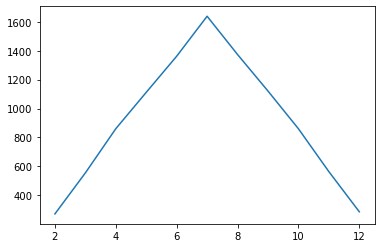

In [9]:
c,d = zip(*sorted(y.items()))
plt.plot(c,d)
plt.show()

***

#### References:

[1] Data Structures; Python; https://docs.python.org/3/tutorial/datastructures.html

[2] Python Dictionaries; W3Schools; https://www.w3schools.com/python/python_dictionaries.asp

[3] Random; Python; https://docs.python.org/3/library/random.html

[4] Plot Dict; matplotlib; https://discourse.matplotlib.org/t/plot-dict/15277/3